In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from matplotlib import pyplot

In [2]:
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 9
# Размер мини-выборки
batch_size = 16
# Количество изображений для обучения
nb_train_samples = 5216
# Количество изображений для проверки
nb_validation_samples = 624
# Количество изображений для тестирования
nb_test_samples = 8

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [6]:
train_generator = datagen.flow_from_directory(
    'chest_xray1/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [7]:
val_generator = datagen.flow_from_directory(
    'chest_xray1/val',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [8]:
test_generator = datagen.flow_from_directory(
    'chest_xray1/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


Epoch 1/9


C:\ProgramData\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1961: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


326/326 [==============================] - 61s 187ms/step - loss: 0.3138 - accuracy: 0.8614 - val_loss: 0.5248 - val_accuracy: 0.7500
Epoch 2/9
326/326 [==============================] - 57s 175ms/step - loss: 0.1942 - accuracy: 0.9390 - val_loss: 0.2840 - val_accuracy: 0.9375
Epoch 3/9
326/326 [==============================] - 58s 177ms/step - loss: 0.1665 - accuracy: 0.9534 - val_loss: 0.2405 - val_accuracy: 0.9375
Epoch 4/9
326/326 [==============================] - 58s 177ms/step - loss: 0.1442 - accuracy: 0.9615 - val_loss: 0.2266 - val_accuracy: 0.8750
Epoch 5/9
326/326 [==============================] - 57s 176ms/step - loss: 0.1378 - accuracy: 0.9615 - val_loss: 0.2670 - val_accuracy: 0.8750
Epoch 6/9
326/326 [==============================] - 57s 176ms/step - loss: 0.1151 - accuracy: 0.9697 - val_loss: 1.0388 - val_accuracy: 0.6875
Epoch 7/9
326/326 [==============================] - 57s 176ms/step - loss: 0.1043 - accuracy: 0.9726 - val_loss: 0.1976 - val_accuracy: 0.8750
Ep

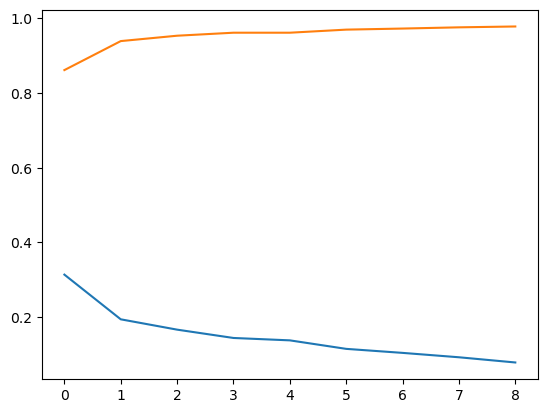

In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)
# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
# pyplot.plot(history.history['val_loss'])
# pyplot.plot(history.history['val_accuracy'])
pyplot.show()

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)

In [ ]:
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

In [26]:
model.save("x_ray_COVID19.h5")